# 00 import module

In [19]:
import pathlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

# 01 load data

In [20]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [21]:
data_dir = keras.utils.get_file(origin=dataset_url,
                               fname='flower_photos',
                               untar=True)
data_dir = pathlib.Path(data_dir)

# 02 preprocessing

In [22]:
train_ds = keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset='training',
seed=2023,
image_size=(224, 224),
batch_size=32)

test_ds = keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset='training',
seed=2023,
image_size=(224, 224),
batch_size=32)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 2936 files for training.


# 03 data explore

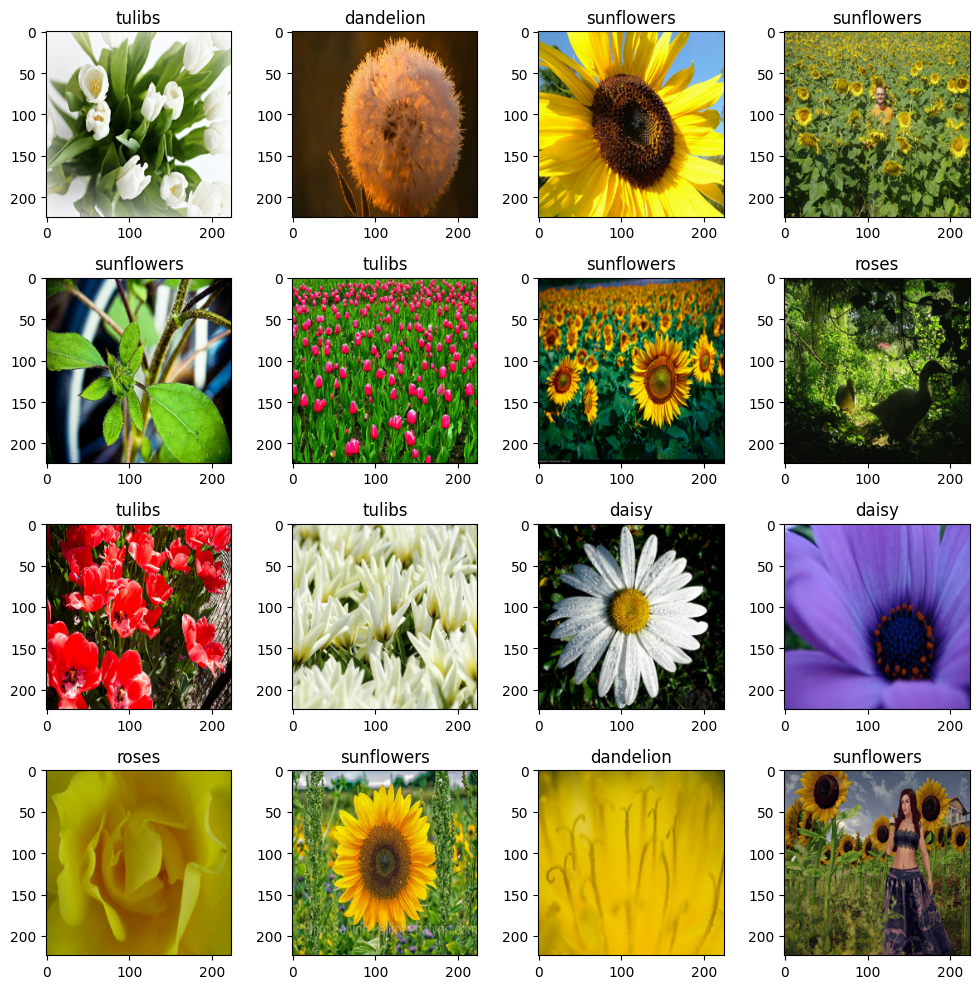

In [23]:
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulibs']
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
plt.tight_layout()

In [34]:
class CNN(keras.Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn1 = keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(224,224,3))
        self.pool1 = keras.layers.MaxPooling2D((2,2))
        self.cnn2 = keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')
        self.pool2 = keras.layers.MaxPooling2D((2,2))
        
        self.flat = keras.layers.Flatten()
        self.fc1 = keras.layers.Dense(128, activation='relu')
        self.out = keras.layers.Dense(5, activation='softmax')
    
    def call(self,x):
        x = self.cnn1(x)
        x = self.pool1(x)
        x = self.cnn2(x)
        x = self.pool2(x)    
        x = self.flat(x)
        x = self.fc1(x)
        
        return self.out(x)

In [35]:
model = CNN()

In [36]:
learning_rate = 1e-4
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True) # multi-label classification 문제라서
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model_second.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model_second.build(input_shape=(1, 224, 224, 3)) # (batch, height, width, channel) - batch는 전체 데이터를 쪼개는 단위, channel은 RGB (여기서는 greyscale이라서 channel이 한 개!)
model_second.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  896       
                                                                 
 max_pooling2d (MaxPooling2  multiple                  0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  multiple                  0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  25690240

In [37]:
model_second.evaluate(test_ds)

92/92 [==============================] - 11s 121ms/step - loss: 0.0824 - accuracy: 0.9911


[0.08244963735342026, 0.9911444187164307]

In [29]:
hist = model_second.fit(train_ds, epochs=1)

92/92 [==============================] - 35s 378ms/step - loss: 0.0775 - accuracy: 0.9932


In [18]:
test_loss, test_accuracy = model.evaluate(test_ds)

print("Test accuracy: ", test_accuracy)
print("Test loss: ", test_loss)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.